In [7]:
import requests
import time

In [5]:
import pandas as pd
import re
import jieba

In [9]:
import codecs,sys

In [6]:
from wordcloud import WordCloud

In [7]:
import PIL.Image as image
import numpy as np

In [19]:
zid = []  # 保存用户id
ztime = []  # 保存用户发表评论的时间
zname = []  # 保存用户姓名
zcomment = []  # 保存用户评论内容
totals = []  # 记录评论的总条数

In [ ]:
def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
    time_array = time.localtime(time_stamp)
    str_date = time.strftime(format_string, time_array)
    return str_date

In [10]:
page = 0
url = "https://www.zhihu.com/api/v4/questions/489382506/answers"
#https://www.zhihu.com/api/v4/questions/489382506/answers?include=data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled
#&offset=&limit=3&sort_by=default&platform=desktop
# 必须添加cookie 信息
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0',
           "cookie": '_zap=7a1c6dab-1410-4313-aba2-c21e63d4d24d; d_c0="ALBe4YrmXROPToc04XpfiZc3Myzrf2nUssE=|1625499074"; _9755xjdesxxd_=32; YD00517437729195:WM_TID=xBFS3dpOnahAAVBFUFd+ziPyO2LQFXf6; gdxidpyhxdE=ha6g16ufKq7bDG25EzTlc3enj+aDZyEoSsOn47yofa9X8s1yV5KlMjmKNiO7XLZqL69SX2K4BwV+VzI7kShK1L/s1lHOhv3QALUmVlnMw7n66ffCJNAAmfQK58qzvjBfrA4QHZSClVQjSJWt/rVUo0jKRhVhtX7iB5klEI1bw4lW7tao:1629623057077; YD00517437729195:WM_NI=KbT7tndxlVL5yOk4MBZcWcm9fF/6kNPnyP6iy0A8d2SAKW6wBuuakX+cOQ+BiAsTYcfTte6hjMUwDUG2AjYHt90hFLyftSCd1TtTt6f1wEEx6iDEyro8htlDYRWIplN4RnA=; YD00517437729195:WM_NIKE=9ca17ae2e6ffcda170e2e6ee94c73aa7ae9baed17aa9bc8fa3d85a929e9e85f13af2a7a6a7d34da2aebfdaca2af0fea7c3b92a89be9cd8f766a8a8a4b7cf3fbb91a5d5d04a9abd9984f033a69ae1d7ea4694b2b7b1b563bbf08fd9e73a919f85b8b57d82abbb82ea54e9bd81b2aa4aab9fbdb5dc69a68cbc86b564aa939b98c75f85ee8f8bdc44b8e70089c548bbbabcb4c270f38cbcb5f73ea6efb9a6c874f6b78ca6fc7aade8a895ef509b8e99aaf3688eec9e8fc437e2a3; z_c0="2|1:0|10:1629622193|4:z_c0|92:Mi4xdEJCR0hRQUFBQUFBc0Y3aGl1WmRFeVlBQUFCZ0FsVk5zVjBQWWdEVVVXUFJWdHBMRXczY1pxdzNQZzktcktSVTlR|c06a6314c75f1df1547f987fa7a6ac723bbebb1cd9bdb0aa835984f1351a45bb"; tst=r; _xsrf=5323ede2-37cd-4ef8-b1ee-18bcc1211315; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1637746350,1637748911,1637749229,1637759080; NOT_UNREGISTER_WAITING=1; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1637763653; KLBRSID=53650870f91603bc3193342a80cf198c|1637764329|1637759078',
           }
data = {
    "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
    "limit": "5",  #&offset=&limit=3&sort_by=default&platform=desktop
    "offset": str(page),
    "platform": "desktop",
    "sort_by": "default"
}
resp = requests.get(url=url, params=data, headers=headers)
##知乎真是🐕，相同的代码就爬不了话题主页，只能爬问答
data_html = resp.json()  # 返回 json 信息， 5个用户一页，保存为字典类型
resp.close()##关闭爬虫

In [79]:
type(data_html)

dict

In [20]:
for i in data_html["data"]:
    id = i['author']['id']
    name = i['author']['name']
    comment = re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i["content"]))
    time_ = timestamp_to_date(i["created_time"])
    # print(name + str(id) + ":" + comment)
    zid.append(id)
    ztime.append(time_)
    zname.append(name)
    zcomment.append(comment)

In [21]:
totals_ = data_html["paging"]["totals"]  # 评论总条数
totals.append(totals_)
# print(totals[0])
totals[0]

1278

In [ ]:
v = list(zip(zid, ztime, zname, zcomment))
print(v)
pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国与祖国强大.xlsx")

## 前面都在调试，后面正式开始

In [23]:
def zhuhuSipder(page):
    url = "https://www.zhihu.com/api/v4/questions/489382506/answers"
    #https://www.zhihu.com/api/v4/questions/488891947/answers?include=data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled&offset=&limit=3&sort_by=default&platform=desktop
    # 必须添加cookie 信息
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0',
               "cookie": '_zap=7a1c6dab-1410-4313-aba2-c21e63d4d24d; d_c0="ALBe4YrmXROPToc04XpfiZc3Myzrf2nUssE=|1625499074"; _9755xjdesxxd_=32; YD00517437729195:WM_TID=xBFS3dpOnahAAVBFUFd+ziPyO2LQFXf6; gdxidpyhxdE=ha6g16ufKq7bDG25EzTlc3enj+aDZyEoSsOn47yofa9X8s1yV5KlMjmKNiO7XLZqL69SX2K4BwV+VzI7kShK1L/s1lHOhv3QALUmVlnMw7n66ffCJNAAmfQK58qzvjBfrA4QHZSClVQjSJWt/rVUo0jKRhVhtX7iB5klEI1bw4lW7tao:1629623057077; YD00517437729195:WM_NI=KbT7tndxlVL5yOk4MBZcWcm9fF/6kNPnyP6iy0A8d2SAKW6wBuuakX+cOQ+BiAsTYcfTte6hjMUwDUG2AjYHt90hFLyftSCd1TtTt6f1wEEx6iDEyro8htlDYRWIplN4RnA=; YD00517437729195:WM_NIKE=9ca17ae2e6ffcda170e2e6ee94c73aa7ae9baed17aa9bc8fa3d85a929e9e85f13af2a7a6a7d34da2aebfdaca2af0fea7c3b92a89be9cd8f766a8a8a4b7cf3fbb91a5d5d04a9abd9984f033a69ae1d7ea4694b2b7b1b563bbf08fd9e73a919f85b8b57d82abbb82ea54e9bd81b2aa4aab9fbdb5dc69a68cbc86b564aa939b98c75f85ee8f8bdc44b8e70089c548bbbabcb4c270f38cbcb5f73ea6efb9a6c874f6b78ca6fc7aade8a895ef509b8e99aaf3688eec9e8fc437e2a3; z_c0="2|1:0|10:1629622193|4:z_c0|92:Mi4xdEJCR0hRQUFBQUFBc0Y3aGl1WmRFeVlBQUFCZ0FsVk5zVjBQWWdEVVVXUFJWdHBMRXczY1pxdzNQZzktcktSVTlR|c06a6314c75f1df1547f987fa7a6ac723bbebb1cd9bdb0aa835984f1351a45bb"; tst=r; _xsrf=5323ede2-37cd-4ef8-b1ee-18bcc1211315; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1637746350,1637748911,1637749229,1637759080; NOT_UNREGISTER_WAITING=1; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1637763653; KLBRSID=53650870f91603bc3193342a80cf198c|1637764329|1637759078',
               }
    data = {
        "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
        "limit": "5",  #&offset=&limit=3&sort_by=default&platform=desktop
        "offset": str(page),
        "platform": "desktop",
        "sort_by": "default"
    }
    resp = requests.get(url=url, params=data, headers=headers)
    data_html = resp.json()  # 返回 json 信息， 5个用户一页
    resp.close()##关闭爬虫
    # 将毫秒数变成 日期格式
    def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
        time_array = time.localtime(time_stamp)
        str_date = time.strftime(format_string, time_array)
        return str_date
    for i in data_html["data"]:
        id = i['author']['id']
        name = i['author']['name']
        ##用正则表达式解析
        comment = re.sub("<p.*?>|</p>|<figure.*?</figure>|<p.*?br/>|<br/>|<a .*?</a>|<h2>.*?</h2>|<hr/>|<b>|</b>|<ul>|</ul>","",str(i["content"]))
        time_ = timestamp_to_date(i["created_time"])
        zid.append(id)
        ztime.append(time_)
        zname.append(name)
        zcomment.append(comment)
 
    totals_ = data_html["paging"]["totals"]  # 评论总条数
    totals.append(totals_)
    return totals[0]

In [24]:
# 多页爬虫
def mulitypage():
    page = 0
    zhuhuSipder(page)##第一页的地方单独爬取
    time.sleep(10)
    while (page < totals[0]):##啥时候回停止？
        print("正在抓取第{}页".format(int(page / 5)))
        page += 5
        zhuhuSipder(page)

In [25]:
# 保存数据
def savedata():
    v = list(zip(zid, ztime, zname, zcomment))
    print(v)
    pd.DataFrame(v, columns=["id", "time", "name", "comment"]).to_excel("孟晚舟回国与祖国强大.xlsx")

In [26]:
 if __name__ == "__main__":
    mulitypage()
    savedata()

正在抓取第0页
正在抓取第1页
正在抓取第2页
正在抓取第3页
正在抓取第4页
正在抓取第5页
正在抓取第6页
正在抓取第7页
正在抓取第8页
正在抓取第9页
正在抓取第10页
正在抓取第11页
正在抓取第12页
正在抓取第13页
正在抓取第14页
正在抓取第15页
正在抓取第16页
正在抓取第17页
正在抓取第18页
正在抓取第19页
正在抓取第20页
正在抓取第21页
正在抓取第22页
正在抓取第23页
正在抓取第24页
正在抓取第25页
正在抓取第26页
正在抓取第27页
正在抓取第28页
正在抓取第29页
正在抓取第30页
正在抓取第31页
正在抓取第32页
正在抓取第33页
正在抓取第34页
正在抓取第35页
正在抓取第36页
正在抓取第37页
正在抓取第38页
正在抓取第39页
正在抓取第40页
正在抓取第41页
正在抓取第42页
正在抓取第43页
正在抓取第44页
正在抓取第45页
正在抓取第46页
正在抓取第47页
正在抓取第48页
正在抓取第49页
正在抓取第50页
正在抓取第51页
正在抓取第52页
正在抓取第53页
正在抓取第54页
正在抓取第55页
正在抓取第56页
正在抓取第57页
正在抓取第58页
正在抓取第59页
正在抓取第60页
正在抓取第61页
正在抓取第62页
正在抓取第63页
正在抓取第64页
正在抓取第65页
正在抓取第66页
正在抓取第67页
正在抓取第68页
正在抓取第69页
正在抓取第70页
正在抓取第71页
正在抓取第72页
正在抓取第73页
正在抓取第74页
正在抓取第75页
正在抓取第76页
正在抓取第77页
正在抓取第78页
正在抓取第79页
正在抓取第80页
正在抓取第81页
正在抓取第82页
正在抓取第83页
正在抓取第84页
正在抓取第85页
正在抓取第86页
正在抓取第87页
正在抓取第88页
正在抓取第89页
正在抓取第90页
正在抓取第91页
正在抓取第92页
正在抓取第93页
正在抓取第94页
正在抓取第95页
正在抓取第96页
正在抓取第97页
正在抓取第98页
正在抓取第99页
正在抓取第100页
正在抓取第101页
正在抓取第102页
正在抓取第103页
正在抓取第104页
正在抓取第105页
正在抓取第106页
正在抓取第107页
正在抓取第108页
正在抓取第109页
正在抓取第110页


数据收集结束，下面开始分词处理

!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

In [12]:
df = pd.read_excel("孟晚舟回国与祖国强大.xls")
comment = df["comment"]
comment

0                                                 宣布996违法
1                                                      如图
2       这已经不是中国第一次发挥坚强后盾作用了。\n2018 年上映的《红海行动》狂轰 36.52 ...
3                                            当不需要一遍遍强调的时候
4                                  怎么撤了热榜啊？不允许我们感受祖国的强大吗？
                              ...                        
1272                                                   感恩
1273                          神神这么多不该管管？入关人来救一下啊，队友呢，队友呢 
1274                                              灯火通明的时候
1275                                                   感恩
1276                                                  赢麻了
Name: comment, Length: 1277, dtype: object

In [13]:
rawdata = []
for i in  comment:
    comment_line = i
    rawdata.append(comment_line)
#不迭代的后果就是mytext的输出结果如下，呜呜呜呜，它中间的部分真的就保存为省略号了

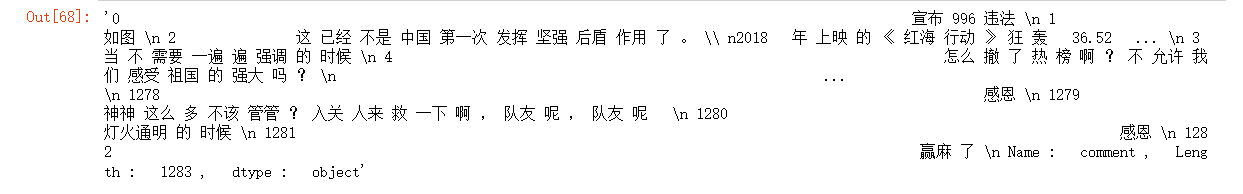

In [14]:
mytext = " ".join(jieba.lcut(str(rawdata)))##jieba.lcut的参数是字符串
#mytext

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HELLOZ~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.065 seconds.
Prefix dict has been built successfully.


In [15]:
mytext

'[ \' 宣布 996 违法 \' ,   \' 如图 \' ,   \' 这 已经 不是 中国 第一次 发挥 坚强 后盾 作用 了 。 \\ n2018   年 上映 的 《 红海 行动 》 狂 轰   36.52   亿元 ， 成为 当年 的 票房 赢家 。 \\ n 电影 讲述 的 是 中国 海军 「 蛟龙 突击队 」 在 执行 撤侨 任务 时 与 恐怖分子 发生 激烈 交锋 ， 最终 惨胜 的 故事 。 \\ n 而 故事 的 背景 就是 取自 「 也门 撤侨 」 这一 真实 事件 。 \\ n \\ n < em > 红海 行动 < / em > \\ n 从   2011   到   2021   年 这 十年 的 时间 内 ， 我国 有 两次 轰动 世界 的 撤侨 事件 。 \\ n 一次 是   2011   年 的 利比亚 撤侨 ， 一次 就是   2015   年 的 也门 撤侨 。 \\ n 也门 撤侨 是 我国 首次 武装 撤侨 行动 ， 也 是 我国 首次 在 战争 背景 下 的 国际 人道主义 救援 行动 ， 意义 重大 。 \\ n 通过 这样 一场 坚定 有力 的 国家 行动 ， 向 全世界 展示 了 中国 力量 和 中国 速度 ， 让 全世界 记住 了 ： 在 中国 ， 人民 的 利益 永远 高于一切 ！ \\ n \\ n < strong > 一 < / strong >   < strong > 死神 的 阴影 < / strong >   \\ n2015   年   3   月   27   日 星期五 ， 也门共和国 。 \\ n26   岁 的 中国 女生 雅丽 一大早 急匆匆 地 跑 进 单位 办公室 ， 打开 电脑 查看 新闻 。 \\ n 此刻 她 正 身处 距离 中国   5929   公里 （ 直线 飞行 距离 ） 的 也门 阿比 扬省 ， 新闻 里 出现 的 一幕幕 让 她 愈发 不安 ： 多地 遭受 战火 荼毒 ， 爆炸 、 枪战 、 抢劫 ， 满眼 尽 是 人们 的 哀嚎 ， 熊熊燃烧 的 建筑 ， 不断 增加 的 死亡 人数 ， 这个 国家 乱套 了 。 \\ n 她 想 回国 ， 但 回不去 了 。 \\ n2   年前 ， 雅丽 从 中国 来到 了 也门 工作 ， 在 一家 合资 水泥厂 担任 

分词处理结束，下面开始停用词处理

In [16]:
##新建一个txt文件，单独提取comment的部分，用来去停用词做目标文件
filename = "孟晚舟回国与祖国强大.txt"
with open(filename, 'w',encoding='utf_8') as f:
    f.write(mytext)

In [17]:
#处理停用词
def stopWord(sourceFile,targetFile,stopkey):
    sourcef = codecs.open(sourceFile, 'r', encoding='utf-8')
    targetf = codecs.open(targetFile, 'w', encoding='utf-8')
    #print 'open source file: '+ sourceFile
    #print 'open target file: '+ targetFile
    lineNum = 1
    line = sourcef.readline()
    while line:
        #print '---processing ',lineNum,' article---'
        sentence = delstopword(line,stopkey)
        #print sentence
        targetf.writelines(sentence + '\n')       
        lineNum = lineNum + 1
        line = sourcef.readline()
    #print 'well done.'
    sourcef.close()
    targetf.close()

In [18]:
#删除停用词
def delstopword(line,stopkey):
    wordList = line.split(' ')          
    sentence = ''
    for word in wordList:
        word = word.strip()##读取出的每一个停用词必须要经过去符号处理即w.strip()，因为读取出的停用词还包含有换行符和制表符，如果不处理则匹配不上。
        if word not in stopkey:
            if word != '\t':
                sentence += word + " "
    return sentence.strip()

In [19]:
if __name__ == '__main__':
    stopkey = [w.strip() for w in codecs.open('stopWord.txt', 'r', encoding='utf-8').readlines()]
    sourceFile = filename
    targetFile = '孟晚舟回国与祖国强大_cut_stopword.txt'
    stopWord(sourceFile,targetFile,stopkey)

停用词处理结束，下面开始制作词云

In [1]:
targetFile = 'title_cut_stopword.txt'

In [2]:
with open(targetFile, 'r',encoding='utf_8') as f:
    lines = f.readlines() 

In [3]:
lines

['孟晚 舟 获释 回国 对华 意味着 对华 影响\n',
 '外交部 谈孟晚 舟 回国 称 「 强大 祖国 永远 一位 中国 公民 坚强 后盾 」 哪一刻 感受 祖国 强大\n',
 '孟晚 舟 已 乘坐 中国政府 包机 离开 加拿大 回到 祖国 对此 想 说\n',
 '孟晚 舟 获释 回国 事件 中 法律 问题 值得 关注 法律 角度 进行 解读\n',
 '看待 孟晚 舟 女士 获释 演讲 「 感谢 祖国 支持 」\n',
 '孟晚 舟 隔离 期 结束 已回 华为 上班 对华 起到 作用\n',
 '月 25 日孟晚 舟 抵达 深圳 感言 「 信念 颜色 一定 中国 红 」 现场 高唱 歌唱祖国 感触\n',
 '孟晚 舟 已经 乘坐 中国政府 包机 离开 加拿大 回到 祖国 值得 关注 信息\n',
 '看待 媒体 评述 「 孟晚 舟 平安 回家 中国 国家 实力 象征 」\n',
 '评价 乌合 麒麟 孟晚 舟 回国 创作 作品 归舟\n',
 '孟晚 舟 获释 回国 美国 此时 孟晚 舟 达成协议 背后 动机 考虑 是否 意味着 对华关系 缓和\n',
 '孟晚 舟 认罪 方式 进行 获释 意味着 背后 不为人知 努力\n',
 '看待 孟晚 舟 律师 发表声明 「 期待 14 月 后 指控 完全 撤销 」\n',
 '孟晚 舟游 张家界 喝 「 拦门 酒 」 网友 热议 「 祖国 山水 最美 最 安全 」 祖国 山水 有多美\n',
 '孟晚 舟案 美国司法部 达成 延迟 起诉 协议 意味着 明年 年底 完全 驳回 起诉\n']

In [4]:
wordcloud = WordCloud(font_path="C:\Windows\Fonts\STXINGKA.TTF").generate(str(lines))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

NameError: name 'WordCloud' is not defined

Populating the interactive namespace from numpy and matplotlib


(-0.5, 639.5, 639.5, -0.5)

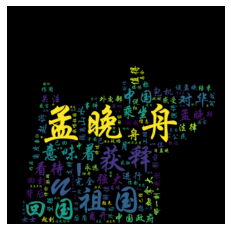

In [14]:
mask = np.array(image.open("刘看山.jpg"))  # 背景图片一定要是白色底。形状为非白色的。
wordcloud = WordCloud(background_color="white",font_path="C:\Windows\Fonts\STXINGKA.TTF",mask=mask).generate(str(lines))

#wordcloud = WordCloud(font_path="C:\Windows\Fonts\STXINGKA.TTF").generate(str(lines))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
image_produce = wordcloud.to_image()
image_produce.show()

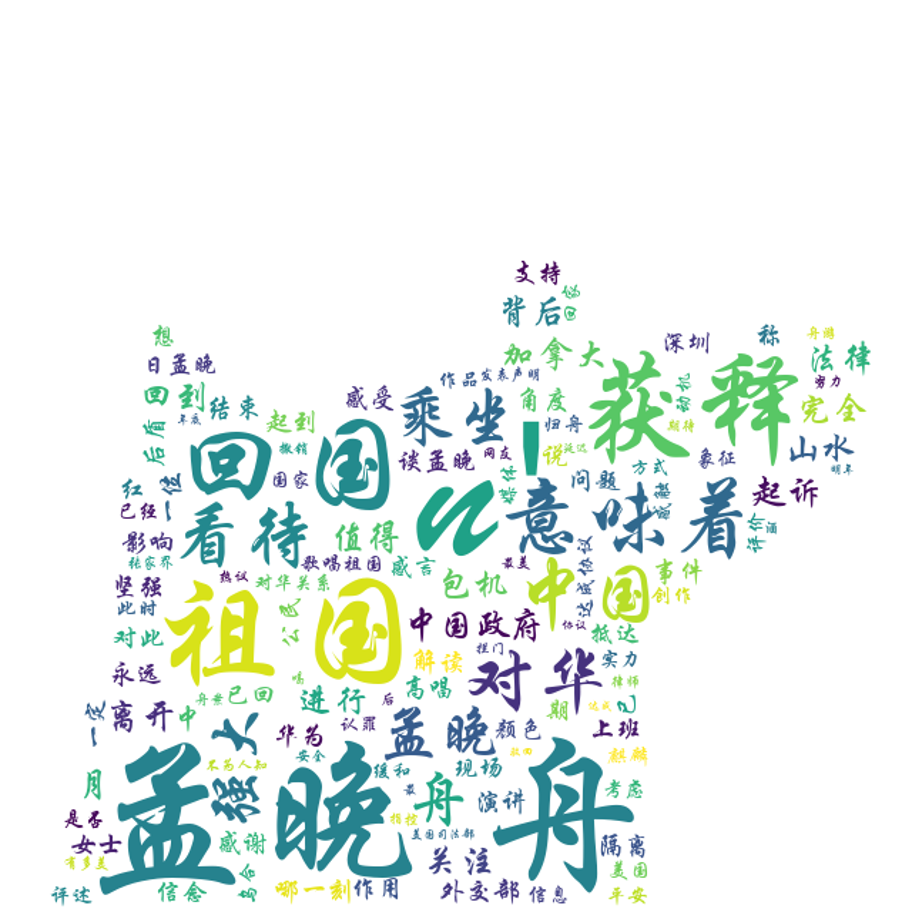